In [ ]:
import os
import pandas as pd
import nrel.routee.powertrain as pt
import matplotlib.pyplot as plt

# Load RouteE BEV model
model = pt.load_model('Transit_Bus_Battery_Electric')

#  Dataset folder
data_folder = r"eVED"

# Collect all weekly CSVs
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

# Empty list for all predictions
all_predictions = []

# for file in csv_files:
#     print(f"Processing {file} ...")
#     path = os.path.join(data_folder, file)
#     data = pd.read_csv(path)

#     # ---- Clean & preprocess ----
#     data["gpsspeed"] = data["Vehicle Speed[km/h]"] * 0.621371  # mph
#     data.rename(columns={"Elevation Smoothed[m]": "elev_m"}, inplace=True)
#     data["grade"] = data["Gradient"]
#     data["ambient_temp"] = data["OAT[DegC]"]

#     # Distance in miles per time step
#     data["miles"] = data["gpsspeed"] * (data["Timestamp(ms)"].diff().fillna(0) / (1000 * 3600))
#     data["cumulative_miles"] = data["miles"].cumsum()

#     # ---- Predict for steady and varying temps ----
#     data["pred_steady_kWh_mi"] = model.predict(
#         data[["gpsspeed", "grade", "miles"]].assign(ambient_temp=20)
#     )

#     data["pred_varying_kWh_mi"] = model.predict(
#         data[["gpsspeed", "grade", "miles"]].assign(
#             ambient_temp=(15 + 10 * (data.index % 100) / 100)  # vary 15–25°C
#         )
#     )

#     # Add file label and store
#     data["week_file"] = file
#     all_predictions.append(data)

# # Combine all weeks
# final_df = pd.concat(all_predictions, ignore_index=True)

# # Save to file
# output_path = r"BEB_predictions_all_weeks.csv"
# final_df.to_csv(output_path, index=False)

# print(f" All 54 weeks processed successfully! Saved to {output_path}")


In [2]:
# Load the combined predictions
data = pd.read_csv("BEB_predictions_all_weeks.csv")

# Quick check
print(data.columns)
print(data.head())

C:\Users\dines\AppData\Local\Temp\ipykernel_9616\2941490558.py:2: DtypeWarning: Columns (30,34,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("BEB_predictions_all_weeks.csv")


Index(['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
       'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]', 'Elevation Raw[m]', 'elev_m',
       'Gradient', 'Energy_Consumption', 'Matchted Latitude[deg]',
       'Matched Longitude[deg]', 'Match Type', 'Class of Speed Limit',
       'Speed Limit[km/h]', 'Speed Limit with Direction[km/h]', 'Intersection',
       'Bus Stops', 'Focus Points', 'gpsspeed', 'grade', 'ambient_temp',
       'miles', 'cumulative_miles', 'pred_steady_kWh_mi',
       'pred_varying_kWh_mi', 'week_file', 'Focus Points;'],
      dtype='object')
    

c:\Users\dines\Desktop\BEB-Energy-Consumption-Modeling\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


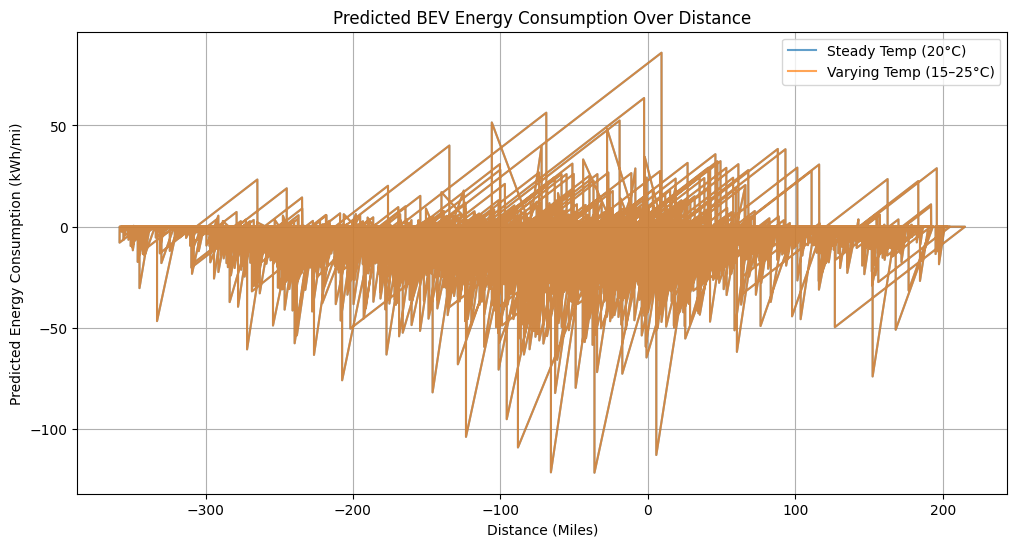

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data["cumulative_miles"], data["pred_steady_kWh_mi"], label="Steady Temp (20°C)", alpha=0.7)
plt.plot(data["cumulative_miles"], data["pred_varying_kWh_mi"], label="Varying Temp (15–25°C)", alpha=0.7)
plt.xlabel("Distance (Miles)")
plt.ylabel("Predicted Energy Consumption (kWh/mi)")
plt.title("Predicted BEV Energy Consumption Over Distance")
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1400x600 with 0 Axes>

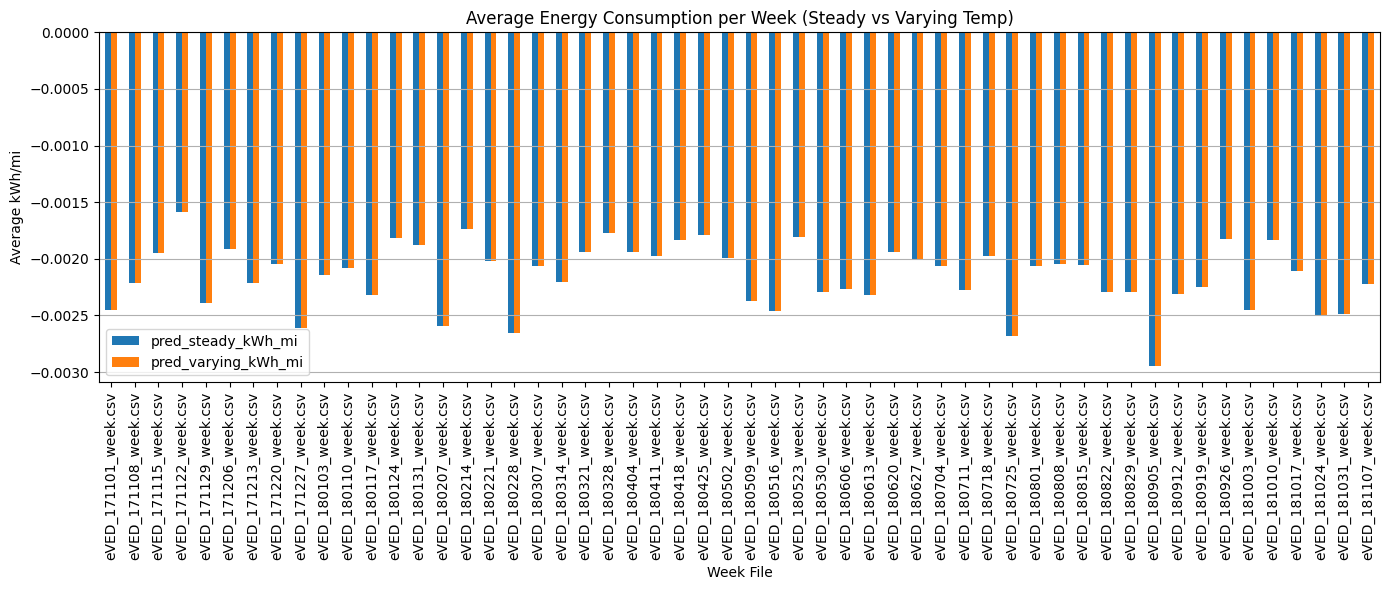

In [4]:
weekly_avg = data.groupby("week_file")[["pred_steady_kWh_mi", "pred_varying_kWh_mi"]].mean()

plt.figure(figsize=(14, 6))
weekly_avg.plot(kind="bar", figsize=(14, 6))
plt.title("Average Energy Consumption per Week (Steady vs Varying Temp)")
plt.ylabel("Average kWh/mi")
plt.xlabel("Week File")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

c:\Users\dines\Desktop\BEB-Energy-Consumption-Modeling\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


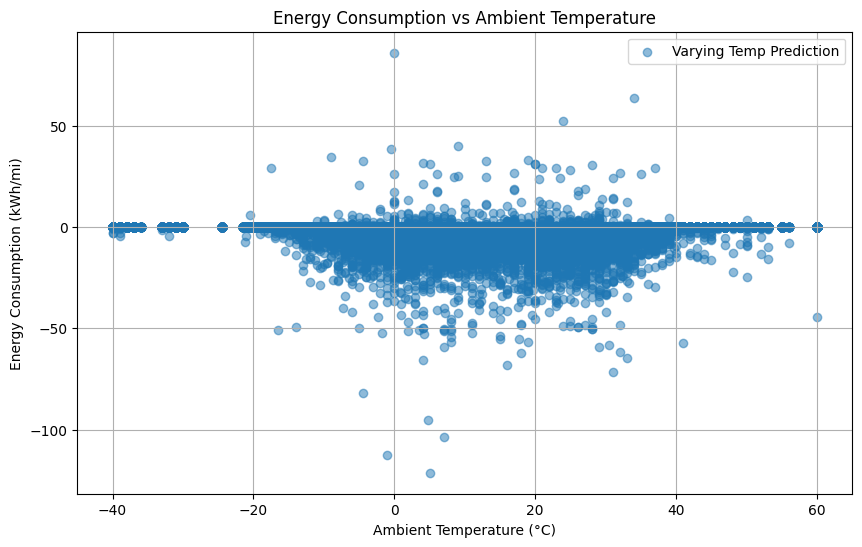

In [5]:
if "ambient_temp" in data.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(data["ambient_temp"], data["pred_varying_kWh_mi"], alpha=0.5, label="Varying Temp Prediction")
    plt.xlabel("Ambient Temperature (°C)")
    plt.ylabel("Energy Consumption (kWh/mi)")
    plt.title("Energy Consumption vs Ambient Temperature")
    plt.legend()
    plt.grid(True)
    plt.show()


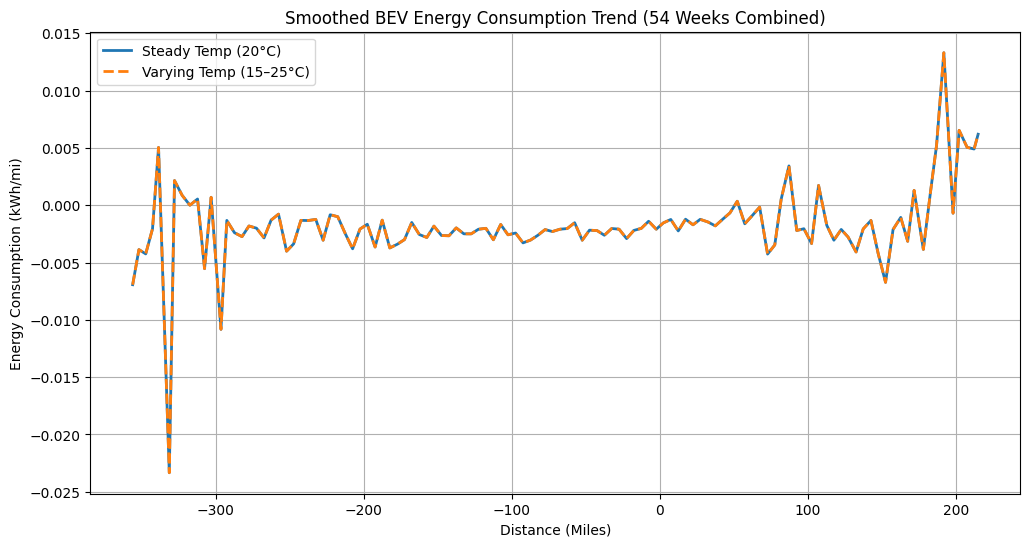

In [6]:
data_agg = data.groupby((data["cumulative_miles"] // 5) * 5).mean(numeric_only=True)

plt.figure(figsize=(12, 6))
plt.plot(data_agg["cumulative_miles"], data_agg["pred_steady_kWh_mi"], label="Steady Temp (20°C)", linewidth=2)
plt.plot(data_agg["cumulative_miles"], data_agg["pred_varying_kWh_mi"], label="Varying Temp (15–25°C)", linewidth=2, linestyle="--")
plt.xlabel("Distance (Miles)")
plt.ylabel("Energy Consumption (kWh/mi)")
plt.title("Smoothed BEV Energy Consumption Trend (54 Weeks Combined)")
plt.legend()
plt.grid(True)
plt.show()
